<a href="https://colab.research.google.com/github/mickeykim70/DL_scratch/blob/main/train_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys, os
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [4]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [10]:
# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 1

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [11]:
# 1 epoch 당 반복 회수
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]

    # 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 epoch 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


Train acc, test acc | 0.94445, 0.9417
Train acc, test acc | 0.9552, 0.9497
Train acc, test acc | 0.9627666666666667, 0.957
Train acc, test acc | 0.9680333333333333, 0.9603
Train acc, test acc | 0.9724666666666667, 0.9641
Train acc, test acc | 0.9765666666666667, 0.9668
Train acc, test acc | 0.97745, 0.9671
Train acc, test acc | 0.9779666666666667, 0.9667
Train acc, test acc | 0.9805, 0.9687
Train acc, test acc | 0.98275, 0.97
Train acc, test acc | 0.98445, 0.9713
Train acc, test acc | 0.9858333333333333, 0.9696
Train acc, test acc | 0.9868666666666667, 0.9694
Train acc, test acc | 0.9886666666666667, 0.9715
Train acc, test acc | 0.9886166666666667, 0.9714
Train acc, test acc | 0.9865833333333334, 0.9683
Train acc, test acc | 0.9885833333333334, 0.9709


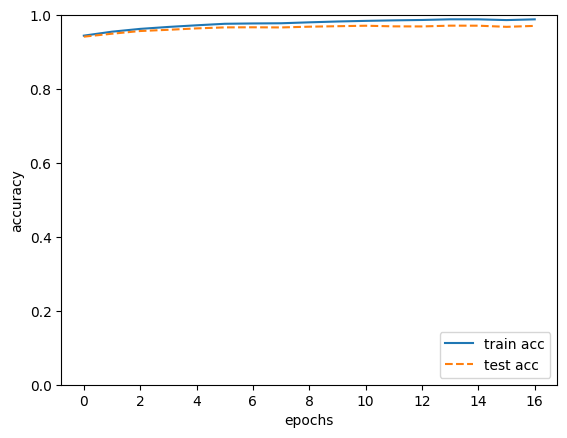

In [12]:
# graph 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
